<h1>Day 3</h1>

In [1]:
# RANDOM FOREST

In [2]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [3]:
# load the dataset
df = pd.read_csv("agricultural sustainability.csv")
df.head()

,soil_health,crop_yield,water_usage,carbon_footprint,fertilizer_use,sustainability
0,0.374540,6778.284815,964.057410,126.020778,226.809659,0
1,0.950714,1757.259685,4561.488080,175.365653,88.134761,0
2,0.731994,2454.658427,2773.635676,129.654718,194.072090,0
3,0.598658,9086.987697,4219.058597,89.916140,201.678762,0
4,0.156019,6457.861537,1940.223205,104.286142,156.032668,0


In [4]:
df.columns

Index(['soil_health', 'crop_yield', 'water_usage', 'carbon_footprint',
       'fertilizer_use', 'sustainability'],
      dtype='object')

In [5]:
# Feature and target
X = df[['soil_health','crop_yield', 'water_usage', 'carbon_footprint','fertilizer_use']]
y = df['sustainability']

In [6]:
# split the dataset : 80:20
xtr , xte , ytr , yte = train_test_split(X,y,train_size=0.8, random_state=42)

In [7]:
print(f"{xtr.shape}")
print(f"{xte.shape}")
print(f"{ytr.shape}")
print(f"{yte.shape}")

(160, 5)
(40, 5)
(160,)
(40,)


In [8]:
# instantiate the model
model = RandomForestClassifier(n_estimators=100, random_state=42)

In [9]:
# train the model
model.fit(xtr,ytr)

RandomForestClassifier(random_state=42)

In [11]:
# predictions
ypred = model.predict(xte)
ypred # 0 is sustainable 1 is not sustainable

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1])

In [13]:
# evaluation - metrics - accuracy score | cm | cr
acc = accuracy_score(yte,ypred)
print(f"The Accuracy Score is: {acc*100:.2f}")

The Accuracy Score is: 92.50


In [15]:
cm = confusion_matrix(yte,ypred)
cm

array([[35,  0],
       [ 3,  2]])

In [16]:
cr = classification_report(yte, ypred)
print(cr)

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        35
           1       1.00      0.40      0.57         5

    accuracy                           0.93        40
   macro avg       0.96      0.70      0.77        40
weighted avg       0.93      0.93      0.91        40



<h1>UNSUPERVISED LEARNING</h1>

In [14]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples
from sklearn.metrics import silhouette_score

In [2]:
#load the dataset
data = pd.read_csv("environmental factors.csv")
data.head()

,temperature,humidity,wind_speed,carbon_emissions,solar_irradiance,pollution_level
0,22.490802,52.418449,19.599966,337.165056,369.020837,84.723658
1,34.014286,49.974726,8.690240,256.681604,185.335998,49.451704
2,29.639879,40.569235,11.932794,484.024336,213.723302,19.546561
3,26.973170,66.436000,18.265613,148.540303,262.604015,73.664179
4,18.120373,58.597450,14.641787,314.535387,283.288001,41.867814


In [ ]:
# There is no target in unsupervised learning all are features - independent variables

: 

In [3]:
# Normalize the features using StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Display Scaled Data
print(pd.DataFrame(data_scaled, columns=data.columns).head())

   temperature  humidity  wind_speed  carbon_emissions  solar_irradiance  \
0    -0.415900 -0.452465    0.801884          0.482494         -0.684316   
1     1.587377 -0.593258   -1.100359         -0.136414         -1.389866   
2     0.826917 -1.135149   -0.534981          1.611824         -1.280827   
3     0.363328  0.355146    0.569224         -0.968007         -1.093072   
4    -1.175669 -0.096466   -0.062635          0.308475         -1.013623   

   pollution_level  
0         1.193409  
1        -0.029923  
2        -1.067119  
3         0.809835  
4        -0.292954  


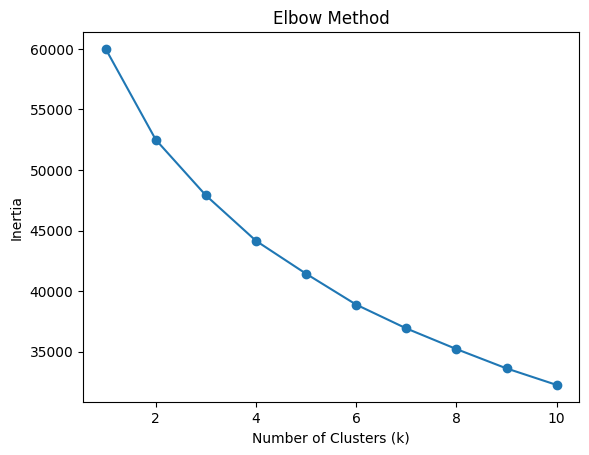

In [6]:
# use the Elbow method to find the optimal number of clusters
inertia = []
k_range = range(1,11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(k_range, inertia, marker = 'o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

In [13]:
# Applying K-Means clustering with k = 5 (as an example)
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
data['cluster'] = kmeans.fit_predict(data_scaled)

# Display first 5 rows with cluster labels
print(data.head())

   temperature   humidity  wind_speed  carbon_emissions  solar_irradiance  \
0    22.490802  52.418449   19.599966        337.165056        369.020837   
1    34.014286  49.974726    8.690240        256.681604        185.335998   
2    29.639879  40.569235   11.932794        484.024336        213.723302   
3    26.973170  66.436000   18.265613        148.540303        262.604015   
4    18.120373  58.597450   14.641787        314.535387        283.288001   

   pollution_level  cluster  
0        84.723658        4  
1        49.451704        3  
2        19.546561        3  
3        73.664179        4  
4        41.867814        4  


In [15]:
# Calculate silhoute score
sil_score = silhouette_score(data_scaled,data['cluster'])
print(f"Sillhoutte Score: {sil_score}")

Sillhoutte Score: 0.11726147152391143


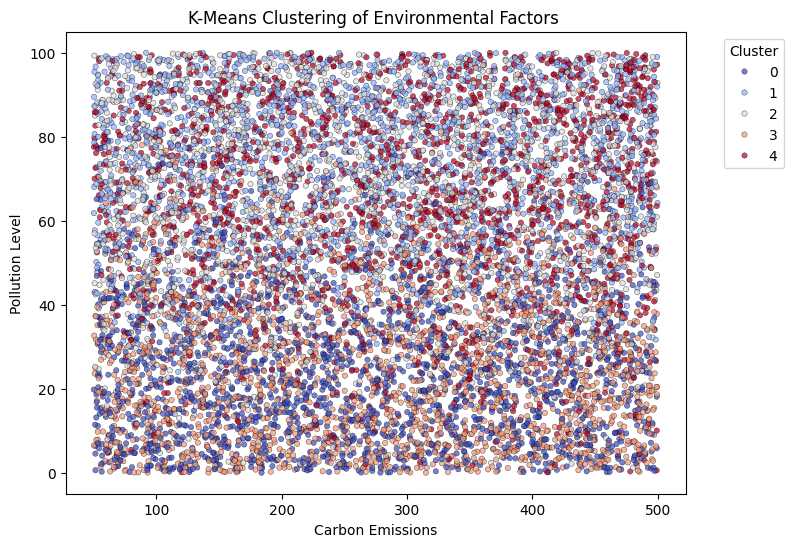

In [42]:
import seaborn as sns
plt.figure(figsize=(8,6))
sns.scatterplot(x='carbon_emissions', y='pollution_level', hue='cluster', data=data, palette='coolwarm', s=15, alpha=0.7, edgecolor='k')
plt.title('K-Means Clustering of Environmental Factors ')
plt.xlabel('Carbon Emissions')
plt.ylabel('Pollution Level')
plt.legend(title='Cluster', bbox_to_anchor=(1.05,1), loc='upper left')
plt.show()